In [38]:
import numpy as np
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
import warnings

from sklearn.model_selection import (
    train_test_split,
    KFold,
    RandomizedSearchCV,
    cross_val_score
)
from scipy.stats import (
    randint,
    uniform
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier



In [39]:
file_path = r'C:\Users\charan\OneDrive\Desktop\waterQuality1.csv'

# Load data into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [40]:
missing_value = ['#NUM!', np.nan]
df = pd.read_csv(r'C:\Users\charan\OneDrive\Desktop\waterQuality1.csv',na_values = missing_value)
df.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


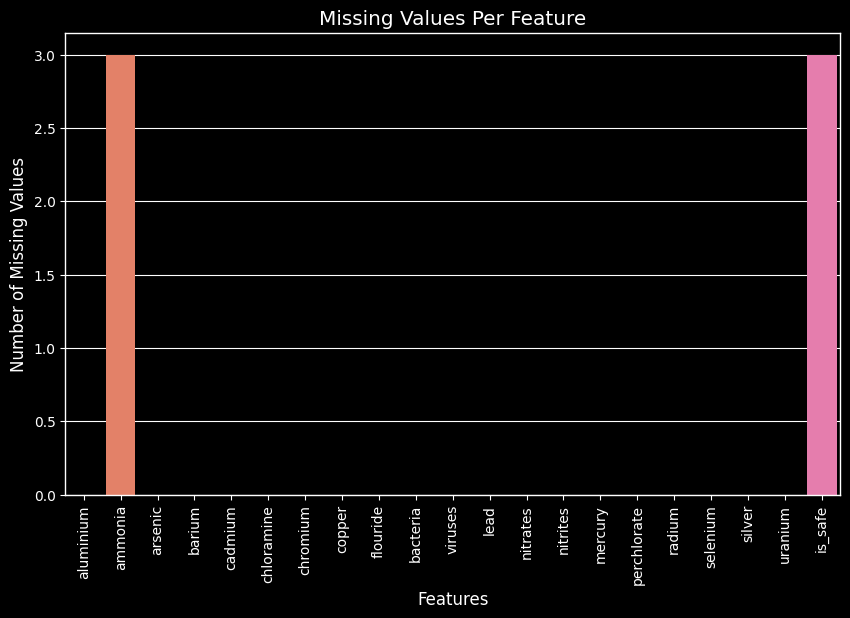

In [41]:
# Check for missing values
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    missing_values_per_feature = df.isnull().sum()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values_per_feature.index, y=missing_values_per_feature.values, hue=missing_values_per_feature.index)
    plt.title('Missing Values Per Feature')
    plt.xlabel('Features')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=90)
    plt.legend([], frameon=False)  # Hide legend
    plt.show()

In [43]:
# Handling missing values for each attribute
for column in df.columns:
    if df[column].isna().sum() > 0:
        # Convert column to numeric (if it's not already numeric)
        df[column] = pd.to_numeric(df[column], errors='coerce')
        column_mean = df[column].mean(skipna=True)
        df[column].fillna(column_mean, inplace=True)


In [44]:
df.dropna(inplace = True)
df['is_safe'].value_counts()

is_safe
0.000000    7084
1.000000     912
0.114057       3
Name: count, dtype: int64

In [45]:
# Split the df into features (X) and target variable (y)
X = df.drop('is_safe', axis=1)
y = df['is_safe']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("df split into training and testing sets.")

df split into training and testing sets.


In [46]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('is_safe', axis = 1),
                                                    df['is_safe'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [47]:
# Cell 4
"""## Initial Analysis"""

# Checking the shape of the dataset
df.shape

# Getting information about the dataset
df.info()

# Converting the 'is_safe' feature into a categorical variable
df['is_safe'] = df['is_safe'].astype('category')

# Checking the number of unique values in each column
df.nunique()

# Descriptive statistics for the dataset
df.describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='PuBu')

# Descriptive statistics for is_safe = 1
df[df['is_safe'] == 1].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='PuBu')

# Descriptive statistics for is_safe = 0
df[df['is_safe'] == 0].describe().T.style.background_gradient(subset=['mean', 'std', '50%', 'count'], cmap='RdBu')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

,count,mean,std,min,25%,50%,75%,max
aluminium,7084.000000,0.514780,1.130361,0.000000,0.030000,0.070000,0.110000,5.050000
ammonia,7084.000000,14.351222,8.907884,-0.080000,6.600000,14.340000,22.240000,29.840000
arsenic,7084.000000,0.172659,0.260127,0.000000,0.030000,0.060000,0.100000,1.050000
barium,7084.000000,1.528281,1.212233,0.000000,0.530000,1.100000,2.420000,4.940000
cadmium,7084.000000,0.046115,0.035633,0.000000,0.010000,0.040000,0.080000,0.130000
chloramine,7084.000000,2.005621,2.531550,0.000000,0.090000,0.410000,3.842500,8.680000
chromium,7084.000000,0.229596,0.264824,0.000000,0.040000,0.080000,0.400000,0.900000
copper,7084.000000,0.799023,0.656550,0.000000,0.090000,0.740000,1.390000,2.000000
flouride,7084.000000,0.770623,0.436384,0.000000,0.400000,0.760000,1.160000,1.500000
bacteria,7084.000000,0.322324,0.330670,0.000000,0.000000,0.220000,0.610000,1.000000


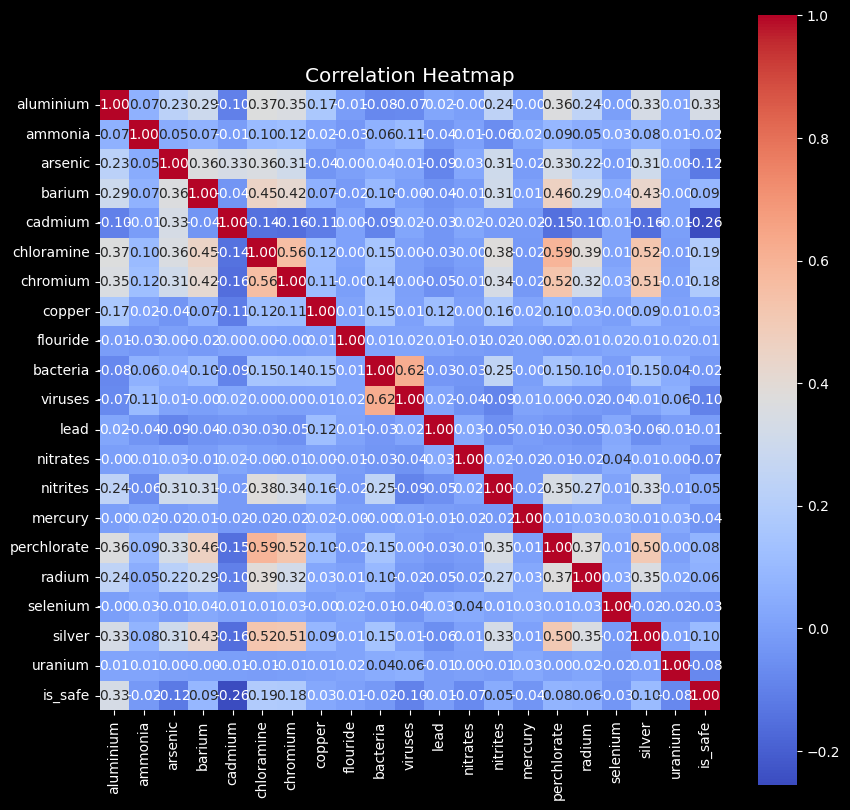

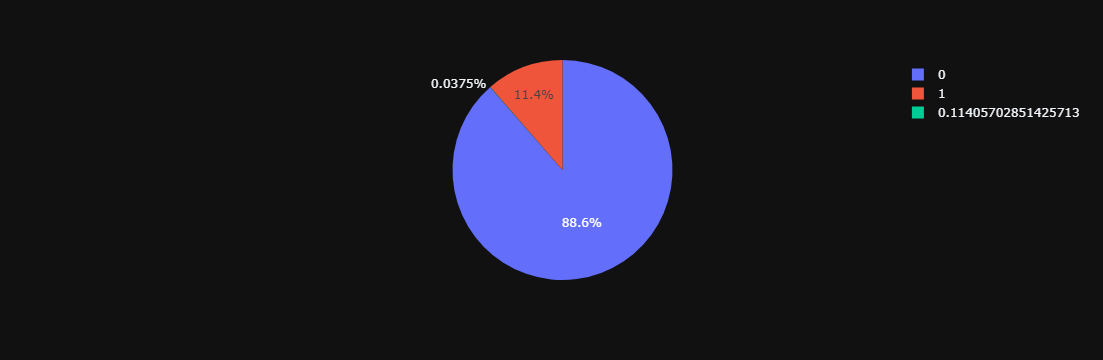

In [48]:
# Cell 6
# Exploratory Data Analysis
Corrmat = df.corr()
plt.subplots(figsize=(10, 10))
sns.heatmap(Corrmat, cmap="coolwarm", square=True, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pie chart
fig = px.pie(df, names='is_safe', hole=0, template='plotly_dark')
fig.show()




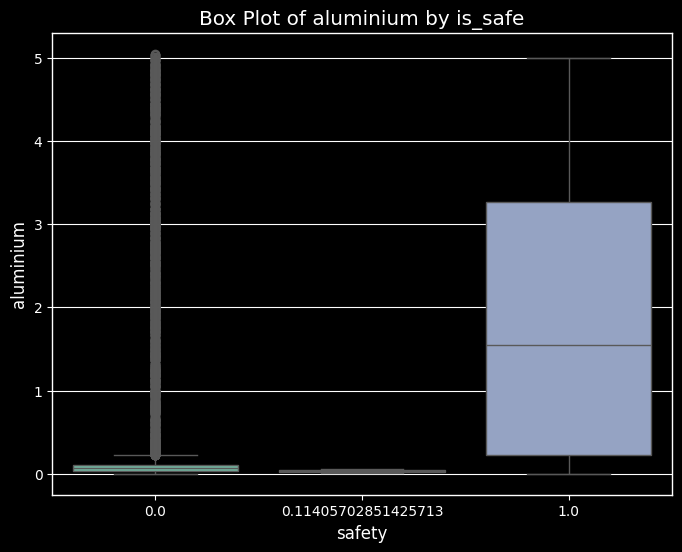

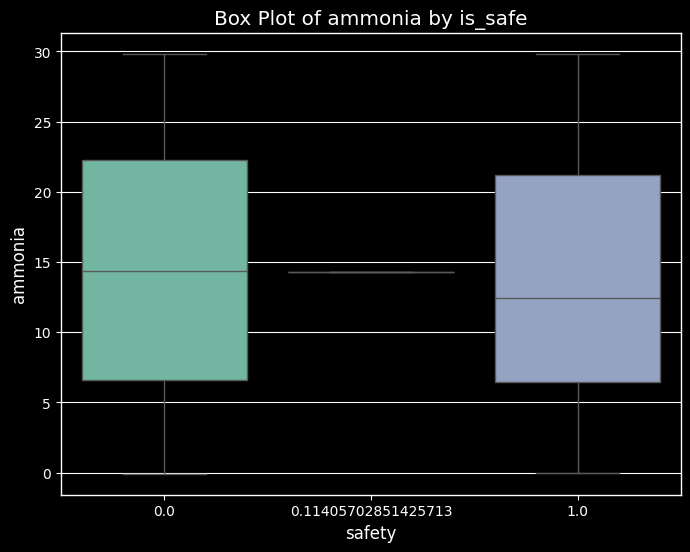

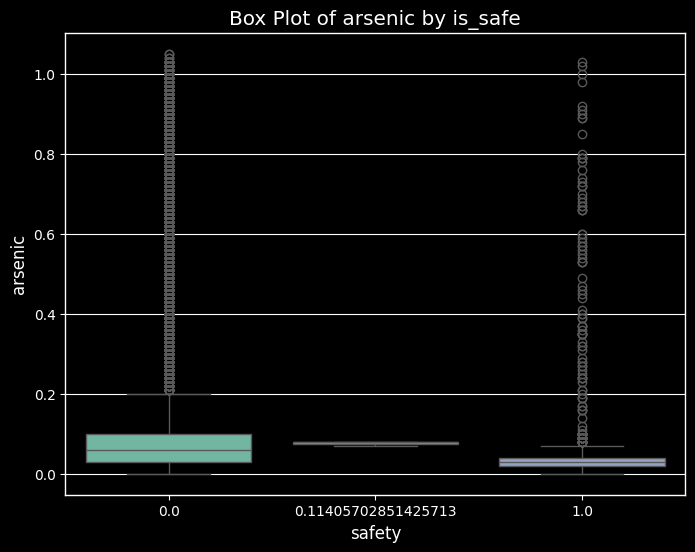

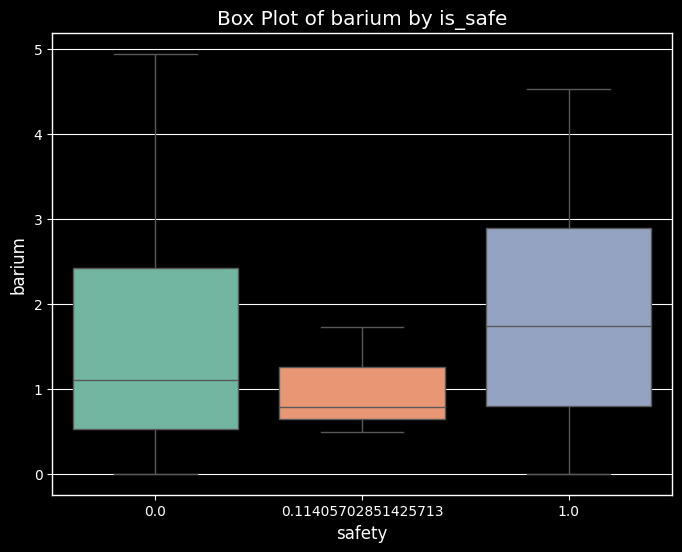

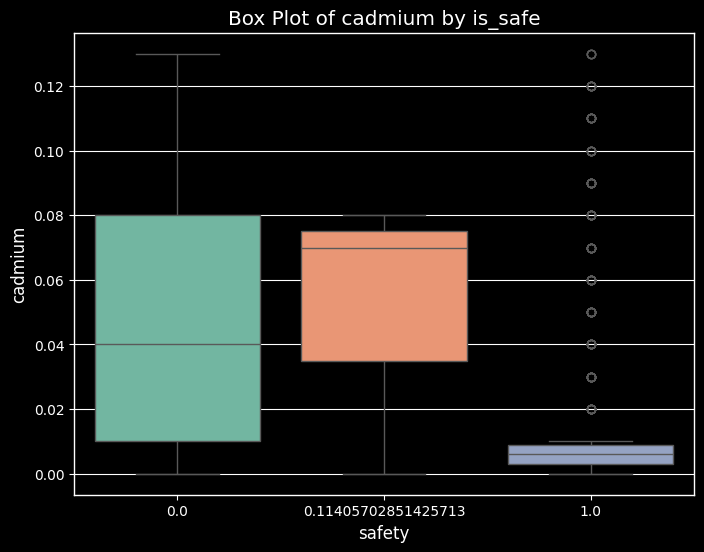

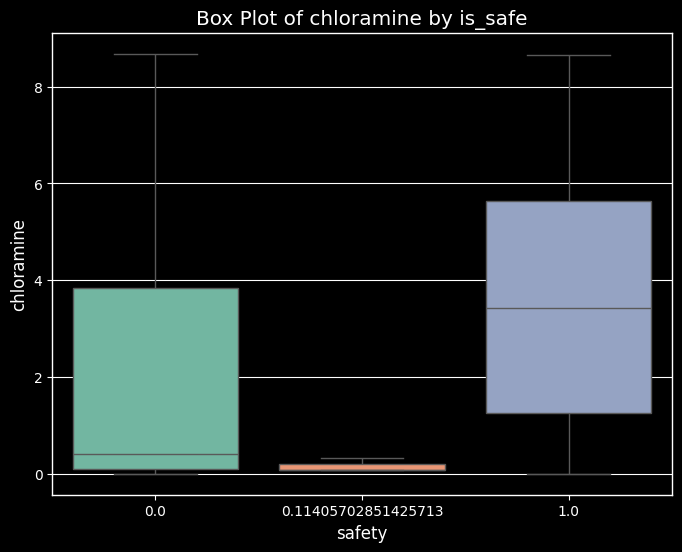

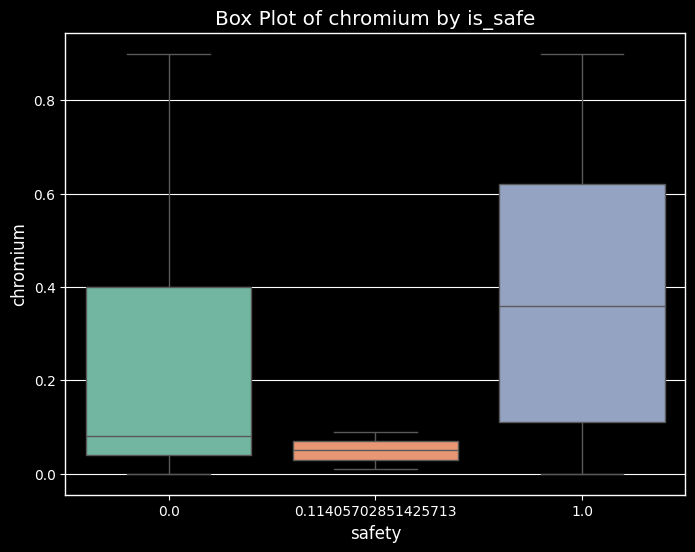

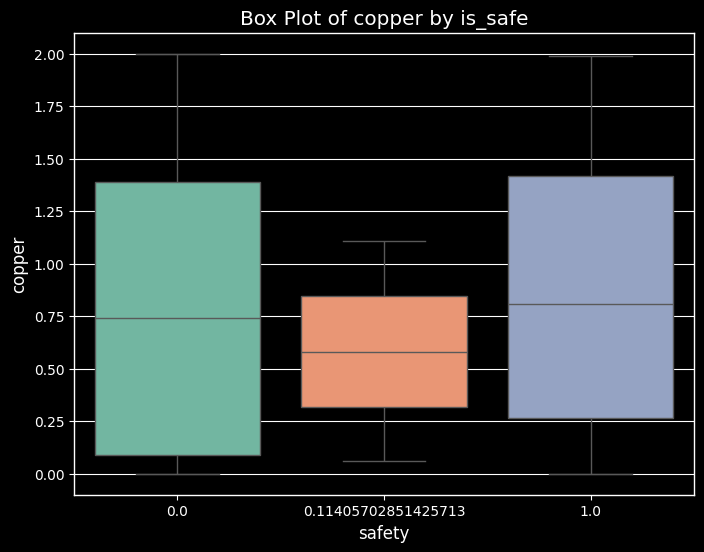

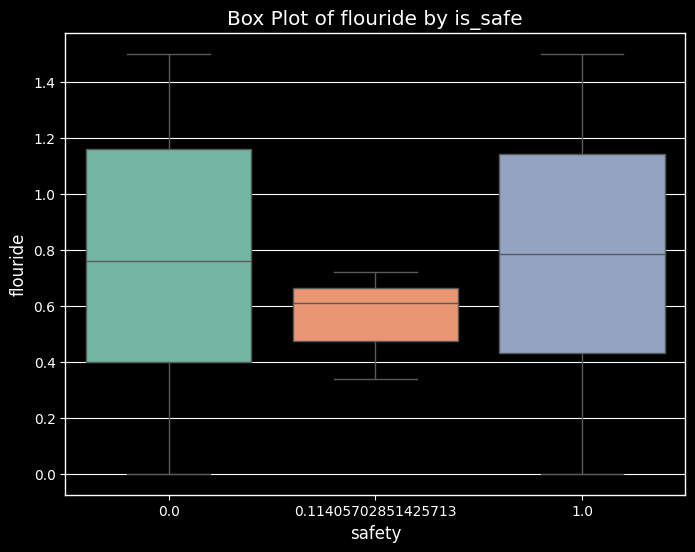

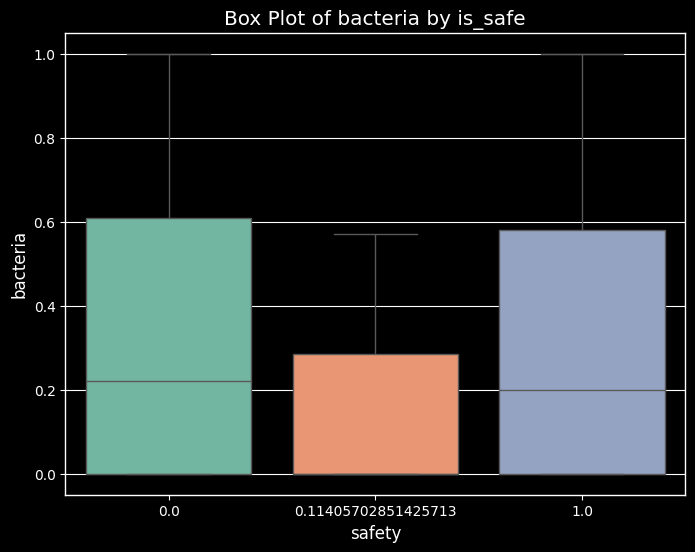

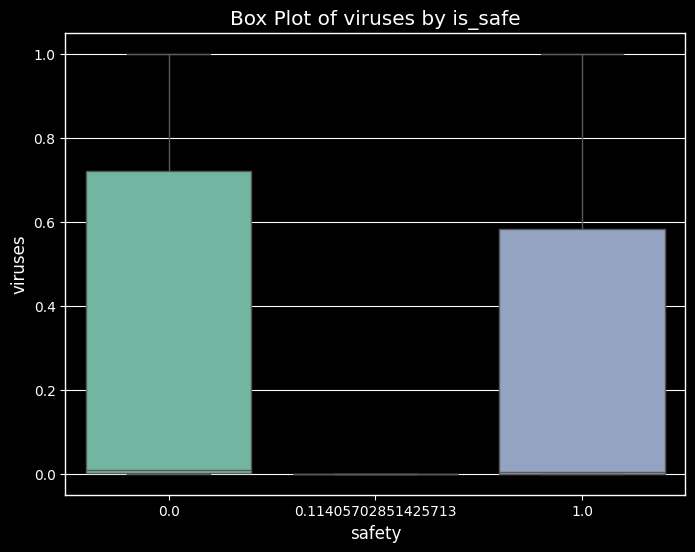

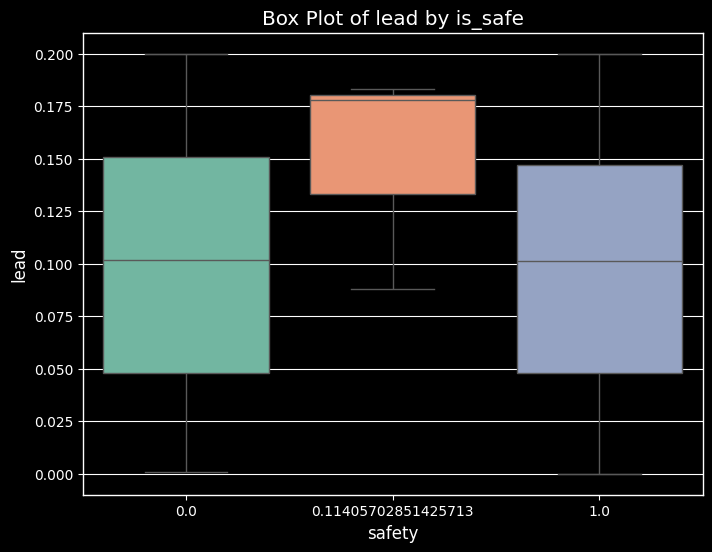

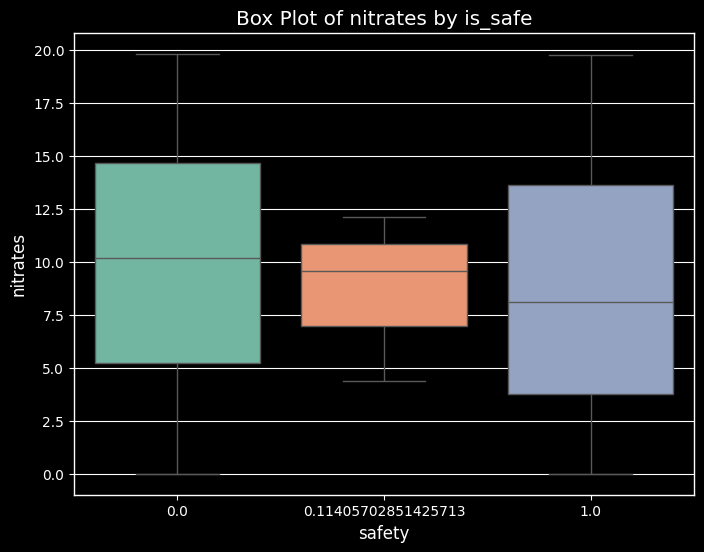

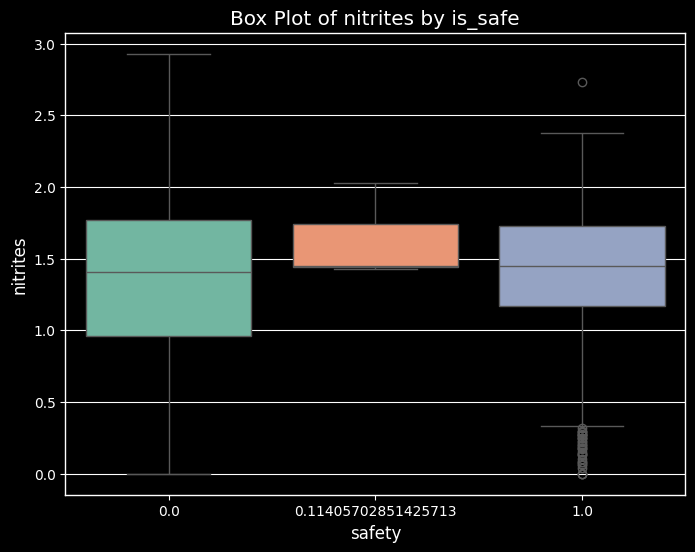

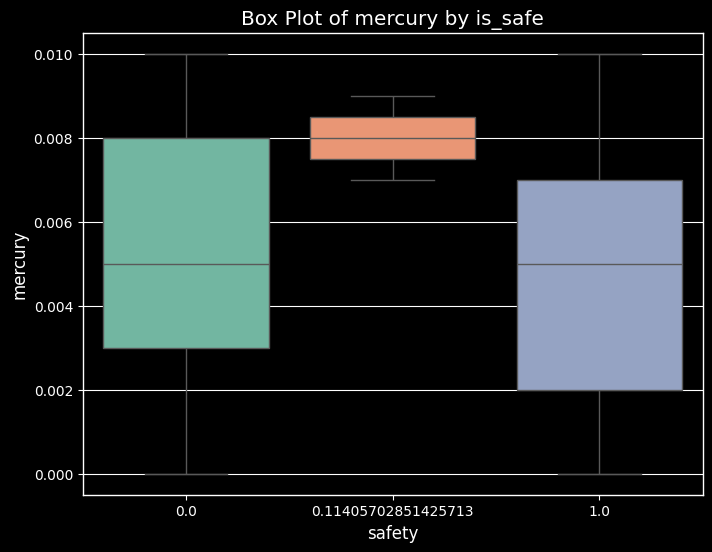

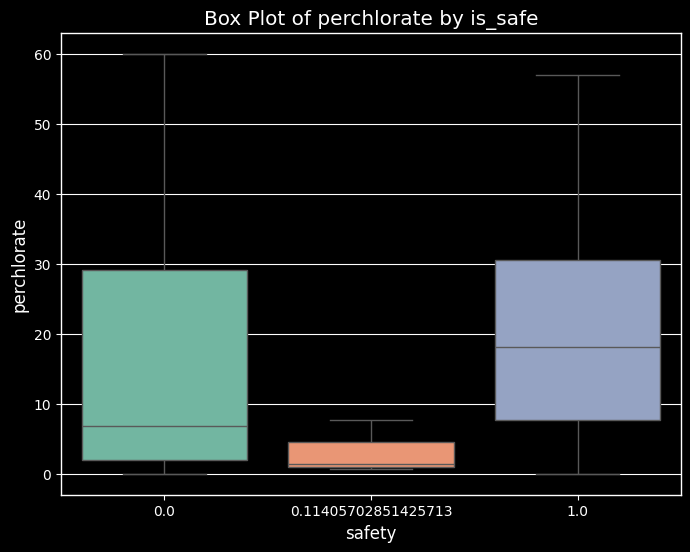

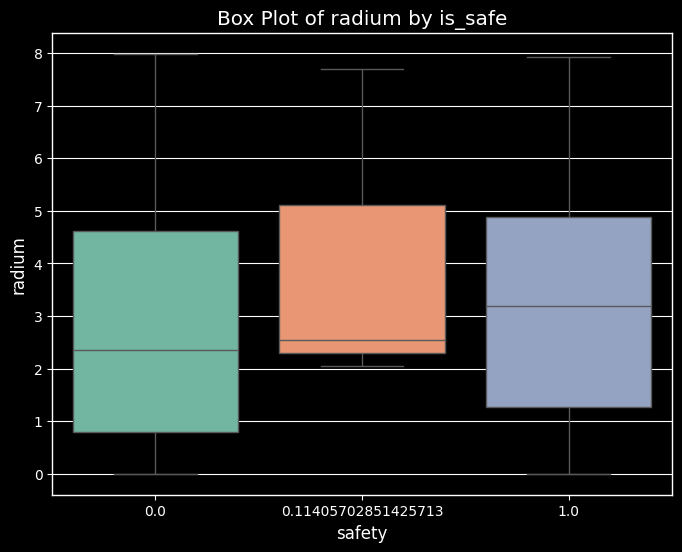

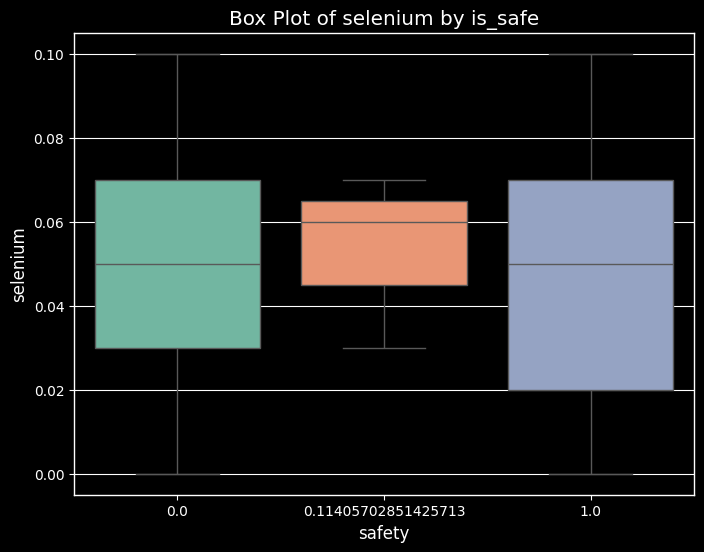

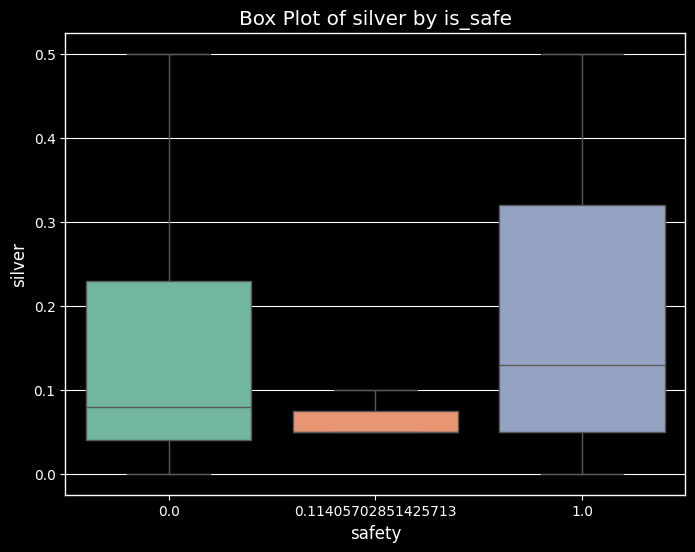

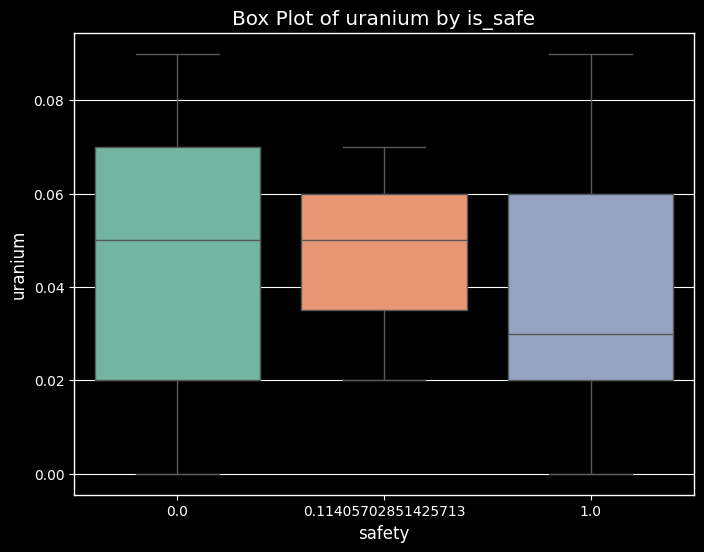

In [49]:
# List of features you want to visualize
features_of_interest = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
                        'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
                        'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium',
                        'selenium', 'silver', 'uranium']

# Creating box plots for multiple features
for feature in features_of_interest:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='is_safe', y=feature, data=df, hue='is_safe', palette='Set2', legend=False)
    plt.title(f'Box Plot of {feature} by is_safe')
    plt.xlabel("safety")
    plt.ylabel(feature)
    plt.show()


KDE plot of different features by is_safe



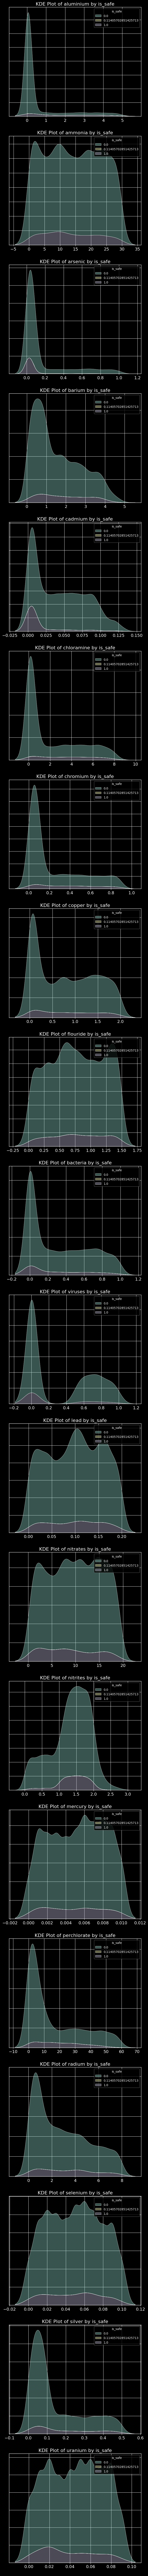

In [50]:

# Handle missing values
df.replace('#NUM!', np.nan, inplace=True)

# List of features for visualization
features_of_interest = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
                        'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
                        'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium',
                        'selenium', 'silver', 'uranium']

# KDE plot of different features by is_safe
print('KDE plot of different features by is_safe\n')

fig, ax = plt.subplots(ncols=1, nrows=len(features_of_interest), figsize=(7, 6*len(features_of_interest)))

for i, col in enumerate(features_of_interest):
    try:
        sns.kdeplot(data=df, x=col, fill=True, alpha=0.4,
                    hue='is_safe', multiple='stack', ax=ax[i],warn_singular=False)
        ax[i].set_xlabel(' ')
        ax[i].set_ylabel(' ')
        ax[i].xaxis.set_tick_params(labelsize=14)
        ax[i].tick_params(left=False, labelleft=False)
        ax[i].set_title(f'KDE Plot of {col} by is_safe', fontsize=16)
    except np.linalg.LinAlgError:
        print(f"LinAlgError occurred for feature: {col}. Consider addressing the issue.")
        continue

plt.tight_layout()
plt.show()


In [52]:

# Define features (X) and target variable (y)
X = df.drop(columns=['is_safe'])  # Features
y = df['is_safe']  # Target variable

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate percentage of data in training and testing sets
train_percent = len(X_train) / len(df) * 100
test_percent = len(X_test) / len(df) * 100

print(f"Percentage of data in training set: {train_percent:.2f}%")
print(f"Percentage of data in testing set: {test_percent:.2f}%")



Percentage of data in training set: 80.00%
Percentage of data in testing set: 20.00%


In [53]:
# Balancing the data by SMOTE - Oversampling of Minority level
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smt = SMOTE()

# Display count of target variable classes before SMOTE
counter_before = Counter(y_train)
print('Before SMOTE', counter_before)
# Convert continuous values into discrete classes
y_train = y_train.round().astype(int)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smt.fit_resample(X_train, y_train)

# Display count of target variable classes after SMOTE
counter_after = Counter(y_train_resampled)
print('\nAfter SMOTE', counter_after)



Before SMOTE Counter({0.0: 5684, 1.0: 712, 0.11405702851425713: 3})

After SMOTE Counter({0: 5687, 1: 5687})


In [54]:
# Initialize the StandardScaler
ssc = StandardScaler()

# Scale the training and testing data
X_train_scaled = ssc.fit_transform(X_train)
X_test_scaled = ssc.transform(X_test) 


# Print the scaled data
print("Scaled Training Data:")
print(X_train_scaled)

print("\nScaled Testing Data:")
print(X_test_scaled)


Scaled Training Data:
[[-0.49905383  0.30901062  0.74675578 ...  1.73969957  1.75763805
  -1.29885638]
 [-0.51488699  1.02811245 -0.47894217 ... -1.03022766  0.57298186
   0.55976475]
 [ 2.98424139  0.94285232  3.07953575 ... -1.03022766 -0.89041696
   0.55976475]
 ...
 [ 1.18717772  0.062205   -0.59755811 ...  0.70097686  0.29423922
   0.93148898]
 [-0.50697041 -0.8307826  -0.55801946 ...  0.70097686 -0.47230302
   1.30321321]
 [-0.45947093 -0.43701545 -0.51848082 ... -0.33774585 -0.89041696
   0.93148898]]

Scaled Testing Data:
[[-0.49905383  1.41851406 -0.63709675 ... -1.72270947 -0.75104565
   0.18804053]
 [-0.30905591  1.40841747 -0.47894217 ... -0.68398676  0.29423922
   0.18804053]
 [-0.35655539 -1.21557499 -0.00447845 ... -0.33774585  2.45449463
   1.67493743]
 ...
 [-0.44363777 -0.06231965 -0.59755811 ...  1.73969957 -0.61167433
   0.55976475]
 [-0.51488699  0.52777015 -0.55801946 ...  0.35473595 -1.02978828
   0.18804053]
 [ 1.86008702  1.04606195  2.7632266  ... -0.68398676 

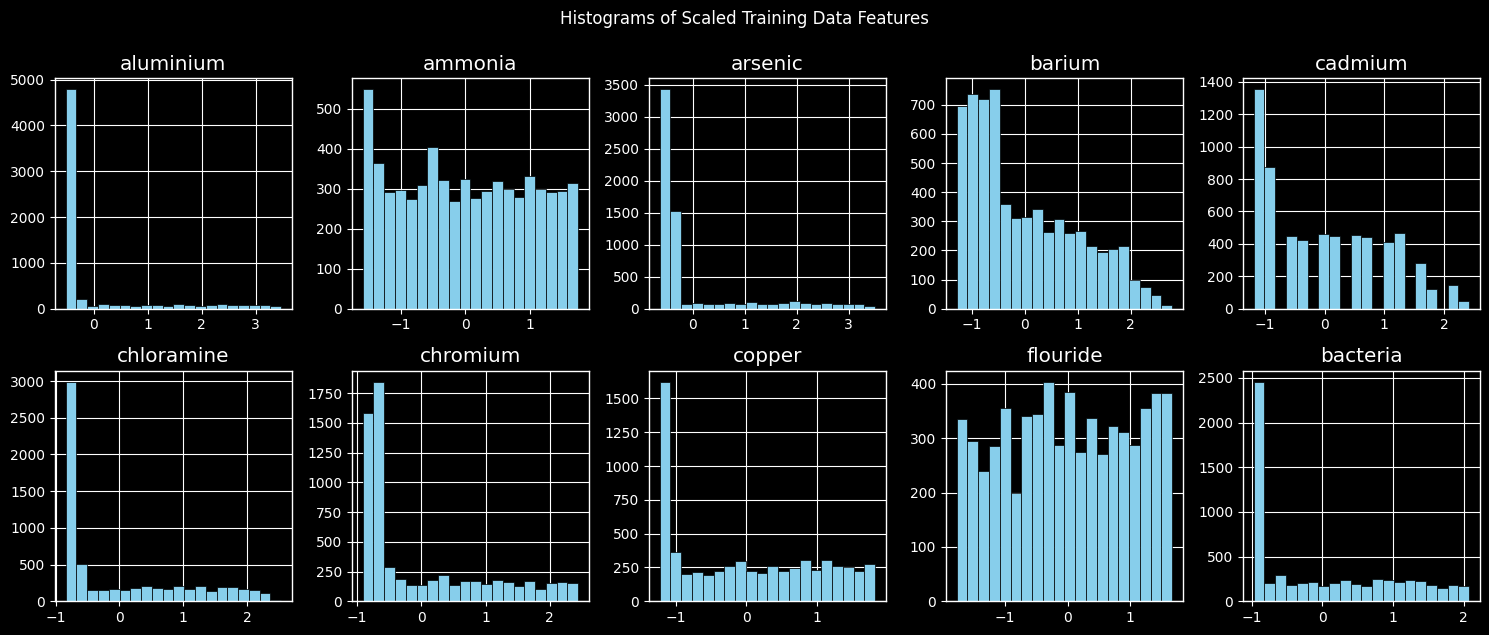

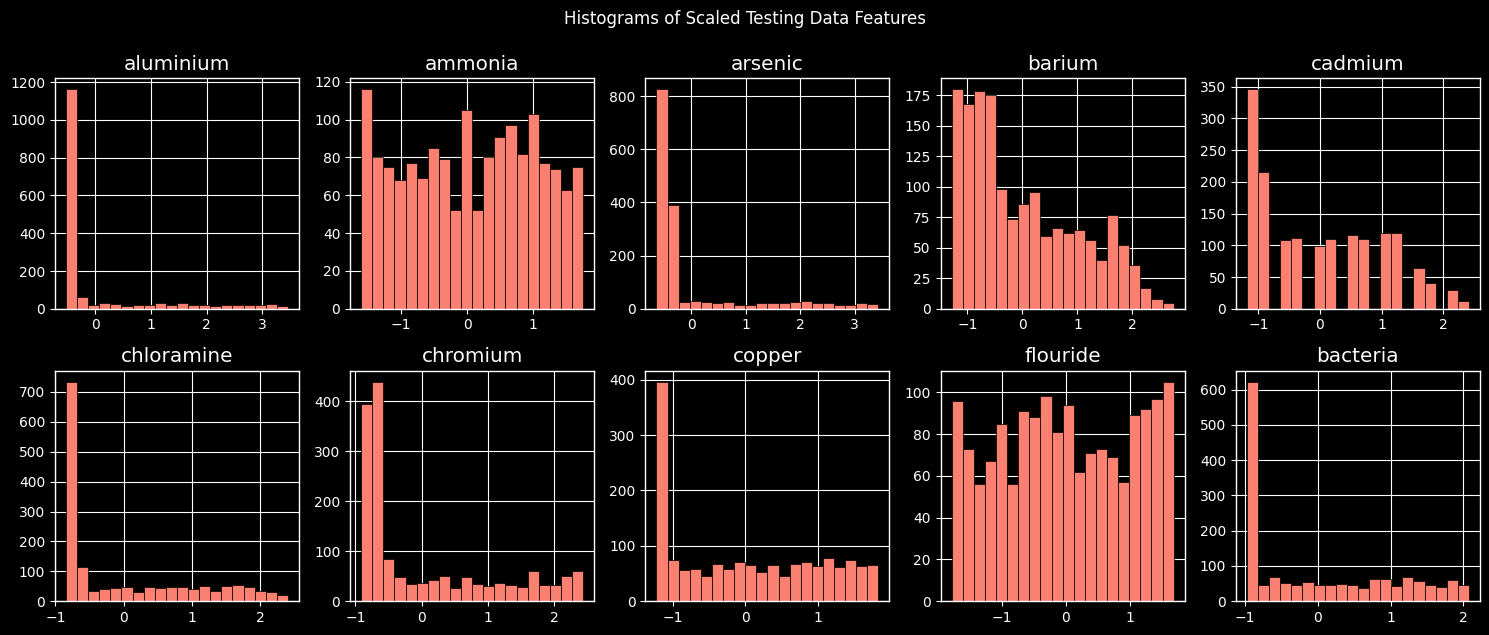

In [55]:
# Assuming you have your input data X_train and X_test


# Assuming X_train_scaled and X_test_scaled are your scaled training and testing data
# And feature_names is a list containing the names of your features

# Define feature names
feature_names = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
                 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
                 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium',
                 'selenium', 'silver', 'uranium']

# Plot histograms for each feature in the training data
plt.figure(figsize=(15, 6))
for i in range(min(10, X_train_scaled.shape[1])):
    plt.subplot(2, 5, i + 1)
    plt.hist(X_train_scaled[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(feature_names[i])  # Set custom feature name
plt.tight_layout()
plt.suptitle('Histograms of Scaled Training Data Features', y=1.05)
plt.show()

# Plot histograms for each feature in the testing data
plt.figure(figsize=(15, 6))
for i in range(min(10, X_test_scaled.shape[1])):
    plt.subplot(2, 5, i + 1)
    plt.hist(X_test_scaled[:, i], bins=20, color='salmon', edgecolor='black')
    plt.title(feature_names[i])  # Set custom feature name
plt.tight_layout()
plt.suptitle('Histograms of Scaled Testing Data Features', y=1.05)
plt.show()





In [57]:
models = [
    RandomForestClassifier(),
    SVC(),
    XGBClassifier()
]

# Initialize lists to store results
train_accuracy = []
test_accuracy = []

# Define KFold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Perform cross-validation and evaluation for each model
for model in models:
    # Cross-validation on training data
    train_result = cross_val_score(model, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
    train_accuracy.append(train_result.mean())

    # Fit the model on training data and make predictions on test data
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluate accuracy on test data
    test_accuracy.append(accuracy_score(y_test, y_pred))

# Create a DataFrame to compare model performances
model_comparison = pd.DataFrame({'Model': ['Random Forest', 'SVM', 'XGBoost'],
                                 'Train_Accuracy': train_accuracy,
                                 'Test_Accuracy': test_accuracy})

print('Model Comparison:')
print(model_comparison)


Model Comparison:
           Model  Train_Accuracy  Test_Accuracy
0  Random Forest        0.956088       0.957500
1            SVM        0.939209       0.932500
2        XGBoost        0.967494       0.970625


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1400
         1.0       0.40      0.21      0.28       200

    accuracy                           0.86      1600
   macro avg       0.65      0.58      0.60      1600
weighted avg       0.83      0.86      0.84      1600



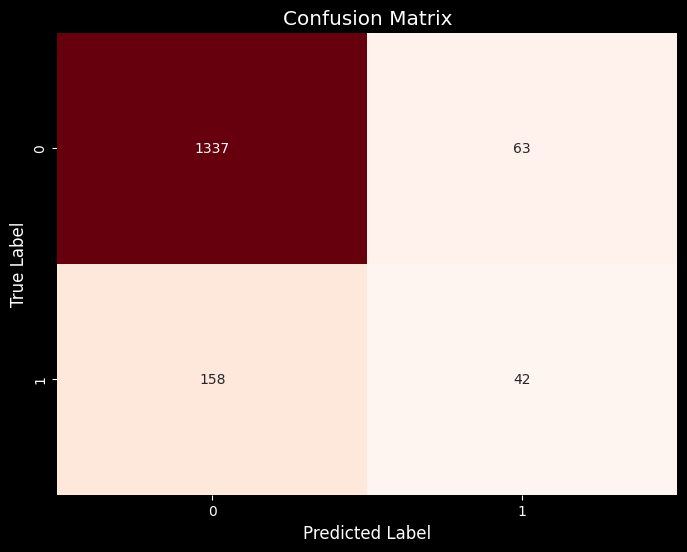

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the SVM model with adjusted hyperparameters for reduced accuracy
model_svm = SVC(C=2, kernel='rbf', gamma='auto', random_state=42)  # Adjust C parameter to reduce accuracy
model_svm.fit(X_train, y_train)

# Make predictions
pred_svm = model_svm.predict(X_test)

# Calculate accuracy score
svm_accuracy = accuracy_score(y_test, pred_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_svm))

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Accuracy: 0.8925
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1400
         1.0       0.80      0.18      0.30       200

    accuracy                           0.89      1600
   macro avg       0.85      0.59      0.62      1600
weighted avg       0.88      0.89      0.86      1600



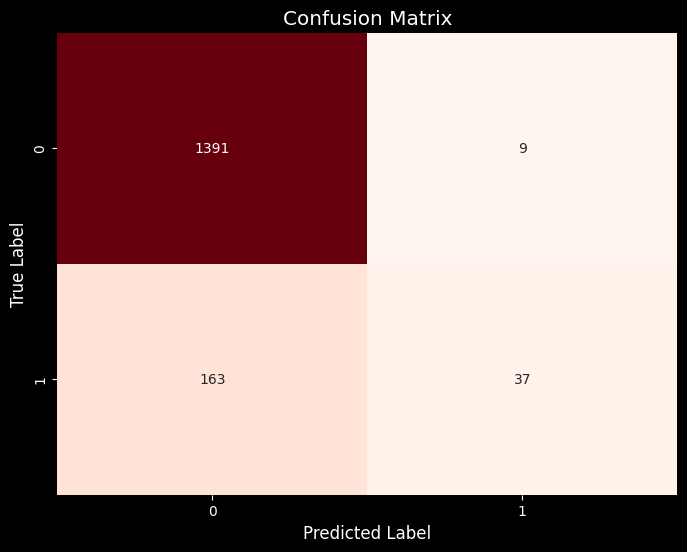

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model with adjusted hyperparameters
model_rf = RandomForestClassifier(n_estimators=2, max_depth=5, min_samples_split=5, min_samples_leaf=1, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
pred_rf = model_rf.predict(X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, pred_rf)
print('Accuracy:',rf_accuracy)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, pred_rf))

# Plot confusion matrix
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Train Score : 0.9989060790748554
Test Score : 0.96625
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1400
         1.0       0.91      0.81      0.86       200

    accuracy                           0.97      1600
   macro avg       0.94      0.90      0.92      1600
weighted avg       0.97      0.97      0.97      1600



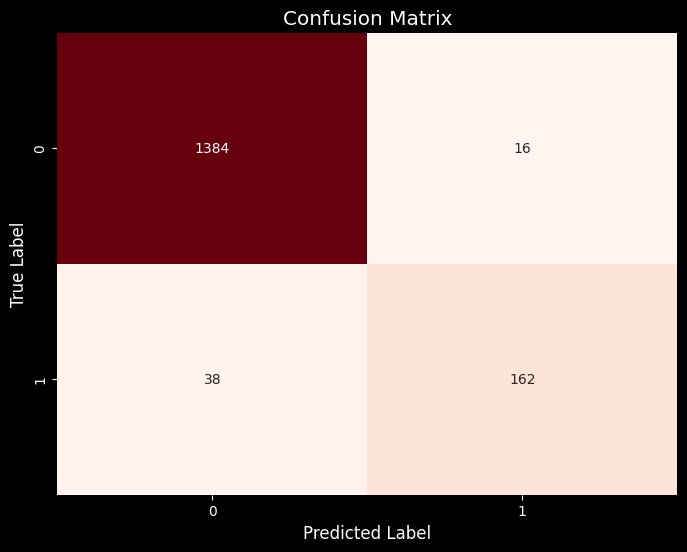

[0 0 0 ... 1 0 0]


In [61]:
#XGBoost

model = XGBClassifier()

param_grid = {
    'n_estimators': randint(50, 251),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 11),
    'gamma': uniform(0.0, 1.0),
}

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

search = RandomizedSearchCV(model,
                            param_grid,
                            scoring = 'accuracy',
                            cv = kf,
                            n_iter = 100,
                            refit = True,
                            n_jobs = -1)

search.fit(X_train, y_train)


print(f'Train Score : {accuracy_score(y_train, search.predict(X_train))}')
print(f'Test Score : {accuracy_score(y_test, search.predict(X_test))}')
confusion_matrix(y_test, search.predict(X_test))
print(classification_report(y_test, search.predict(X_test)))

# Print confusion matrix
cm_xgb= confusion_matrix(y_test, search.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(search.predict(X_train))

Random Forest Classifier Feature Importance:


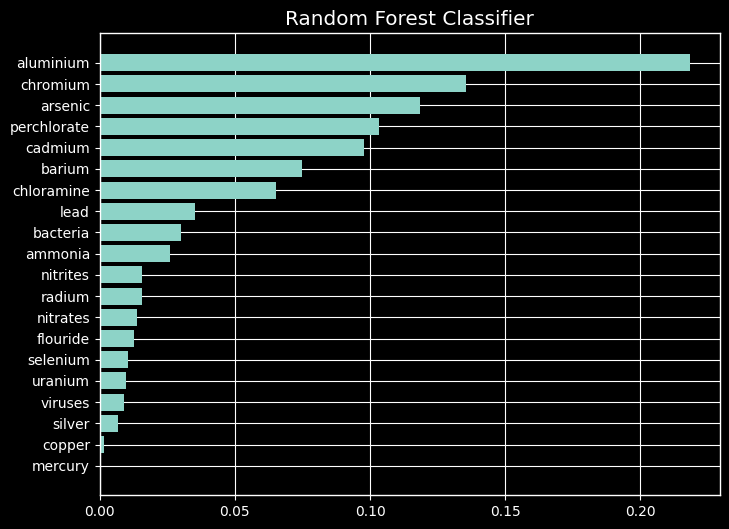

XGB Classifier Feature Importance:


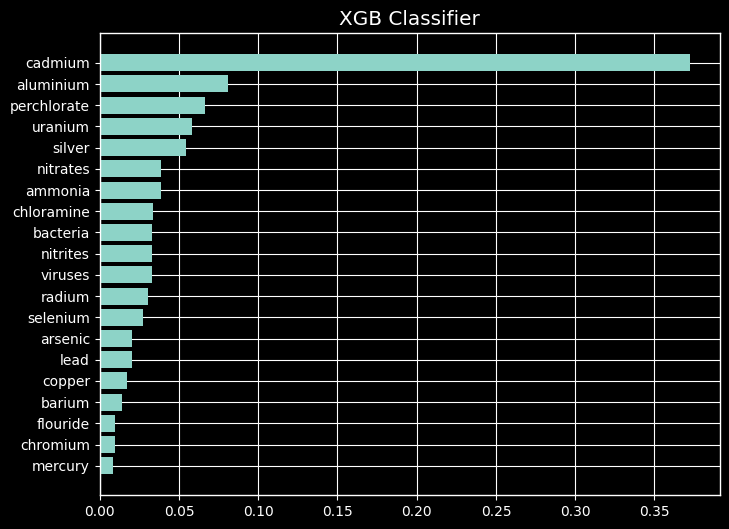

Support Vector Classifier (SVC) Feature Importance:
Model does not support feature importance analysis.


In [62]:
# Update the function to handle the case where the model is a RandomForestClassifier
import xgboost as xgb
def plot_feature_importance(model, feature_names, title):
    try:
        if hasattr(model, 'feature_importances_'):  # Check if model has feature_importances_ attribute
            feature_importance = model.feature_importances_
            sorted_idx = np.argsort(feature_importance)
            y_ticks = np.arange(0, len(feature_names))
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.barh(y_ticks, feature_importance[sorted_idx])
            ax.set_yticks(y_ticks)
            ax.set_yticklabels(np.array(feature_names)[sorted_idx])
            ax.set_title(title)
            plt.show()
        elif isinstance(model, xgb.XGBModel):  # Check if model is an XGBModel instance
            booster = model.get_booster()
            importance = booster.get_score(importance_type='weight')
            sorted_idx = np.argsort(list(importance.values()))
            feature_importance = [importance[list(importance.keys())[i]] for i in sorted_idx]
            y_ticks = np.arange(0, len(feature_names))
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.barh(y_ticks, feature_importance)
            ax.set_yticks(y_ticks)
            ax.set_yticklabels(np.array(feature_names)[sorted_idx])
            ax.set_title(title)
            plt.show()
        elif hasattr(model, 'coef_'):  # Check if model has coef_ attribute (for Logistic Regression)
            feature_importance = np.abs(model.coef_[0])
            sorted_idx = np.argsort(feature_importance)
            y_ticks = np.arange(0, len(feature_names))
            fig, ax = plt.subplots(figsize=(8, 6))
            ax.barh(y_ticks, feature_importance[sorted_idx])
            ax.set_yticks(y_ticks)
            ax.set_yticklabels(np.array(feature_names)[sorted_idx])
            ax.set_title(title)
            plt.show()
        else:
            print("Model does not support feature importance analysis.")
    except AttributeError as e:
        print("AttributeError:", e)

# Example usage:

# Random Forest Classifier Feature Importance
print("Random Forest Classifier Feature Importance:")
plot_feature_importance(model_rf, X.columns, "Random Forest Classifier")

# XGB Classifier Feature Importance
print("XGB Classifier Feature Importance:")
# Fit the XGBoost model before calling plot_feature_importance
model.fit(X_train, y_train)
plot_feature_importance(model, X.columns, "XGB Classifier")


# Support Vector Classifier (SVC) Feature Importance
print("Support Vector Classifier (SVC) Feature Importance:")
plot_feature_importance(model_svm, X.columns, "Support Vector Classifier")


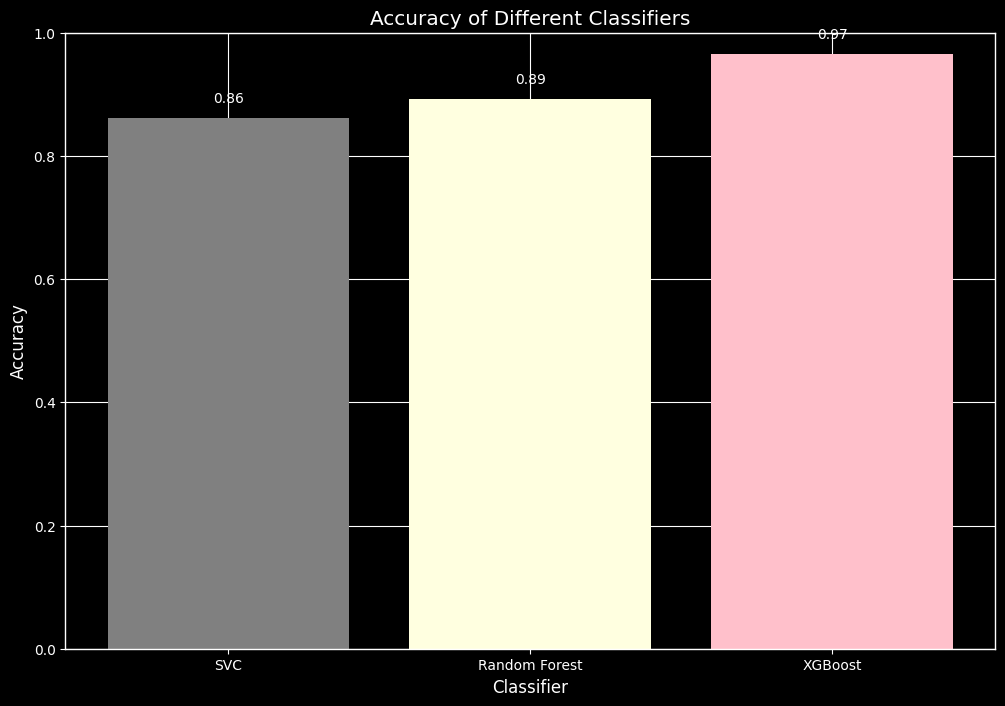

In [85]:
# Cell 20
# Calculate accuracy scores for each model
accuracy_scores = [
    accuracy_score(y_test, pred_svm),
    accuracy_score(y_test, pred_rf),
    accuracy_score(y_test, search.predict(X_test)),
]

# Plotting the accuracy scores
plt.figure(figsize=(12, 8))
plt.bar(['SVC','Random Forest', 'XGBoost'], accuracy_scores, color=['grey','lightyellow','pink'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding accuracy values on top of bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', va='bottom')

plt.show()

In [87]:
# Assuming you have already defined your features (X_train) and target variable (y_train)
# and also trained your XGBoost model (xgb_model)

import numpy as np

# Take 5 random values from the dataset for prediction
random_indices = np.random.choice(len(X_train), 10)  # Adjust the number of samples as needed
X_random = X_train.iloc[random_indices]

# Predict probabilities using the trained XGBoost model
y_prob_random = xgb_model.predict_proba(X_random)[:, 1]  # Assuming class 1 is positive (safe for drinking)

# Define your threshold
threshold = 0.3 # Adjust the threshold as needed

# Convert probabilities to class labels based on the threshold
y_pred_random = (y_prob_random > threshold).astype(int)

# Interpret predictions
interpretation = ['Potable (Safe for Drinking)' if pred == 1 else 'Not Potable (Not Safe for Drinking)' for pred in y_pred_random]

# Display predictions along with the corresponding random values
predictions_df = pd.DataFrame({'Random Sample Index': random_indices, 'Predicted Potability': y_pred_random, 'Predicted Drinking Water': interpretation})
print("Predictions using XGBoost Model (Random Samples):")
print(predictions_df)


Predictions using XGBoost Model (Random Samples):
   Random Sample Index  Predicted Potability  \
0                 1608                     0   
1                 1632                     0   
2                 1238                     0   
3                 5927                     1   
4                 4189                     0   
5                  375                     0   
6                 1483                     0   
7                  975                     0   
8                 4933                     0   
9                 4105                     1   

              Predicted Drinking Water  
0  Not Potable (Not Safe for Drinking)  
1  Not Potable (Not Safe for Drinking)  
2  Not Potable (Not Safe for Drinking)  
3          Potable (Safe for Drinking)  
4  Not Potable (Not Safe for Drinking)  
5  Not Potable (Not Safe for Drinking)  
6  Not Potable (Not Safe for Drinking)  
7  Not Potable (Not Safe for Drinking)  
8  Not Potable (Not Safe for Drinking)  
9          